In [6]:
import yfinance as yf
stock = yf.Ticker('^GSPC')
hist = stock.history(period='max')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3172510000,0,0
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,5006680000,0,0
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,4582620000,0,0


In [7]:
23366*7

163562

In [8]:
import pandas as pd

HIST = pd.DataFrame(hist[['Open','High','Low','Close','Volume']])
HIST.columns = ['open','high','low','close','volume']
HIST.to_pickle('sp500_max_hist.pkl')

In [9]:
from pandas.io.pickle import read_pickle

raw = pd.read_pickle('sp500_max_hist.pkl')

In [21]:
raw['sma2'] = raw['close'].rolling(window=2).mean()
raw['sma5'] = raw['close'].rolling(window=5).mean()
raw['sma8'] = raw['close'].rolling(window=8).mean()
raw['sma10'] = raw['close'].rolling(window=10).mean()
raw['sma13'] = raw['close'].rolling(window=13).mean()
raw['sma20'] = raw['close'].rolling(window=20).mean()
raw['sma50'] = raw['close'].rolling(window=50).mean()
raw['sma200'] = raw['close'].rolling(window=200).mean()
weights = np.arange(1,16)
raw['wma15'] = raw['close'].rolling(15).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
raw['ema12'] = raw['close'].ewm(span=12).mean()
raw['ema15'] = raw['close'].ewm(span=15).mean()
raw['ema26'] = raw['close'].ewm(span=26).mean()

In [22]:
trading_system_initial = raw[[
    'close','sma2','sma5','sma8','sma10','sma13','sma20','sma50','sma200','wma15','ema12', 'ema15', 'ema26']]

In [30]:
last_year = trading_system_initial.iloc[-21*8:]
last_year['MACD'] = last_year['ema12'] - last_year['ema26']

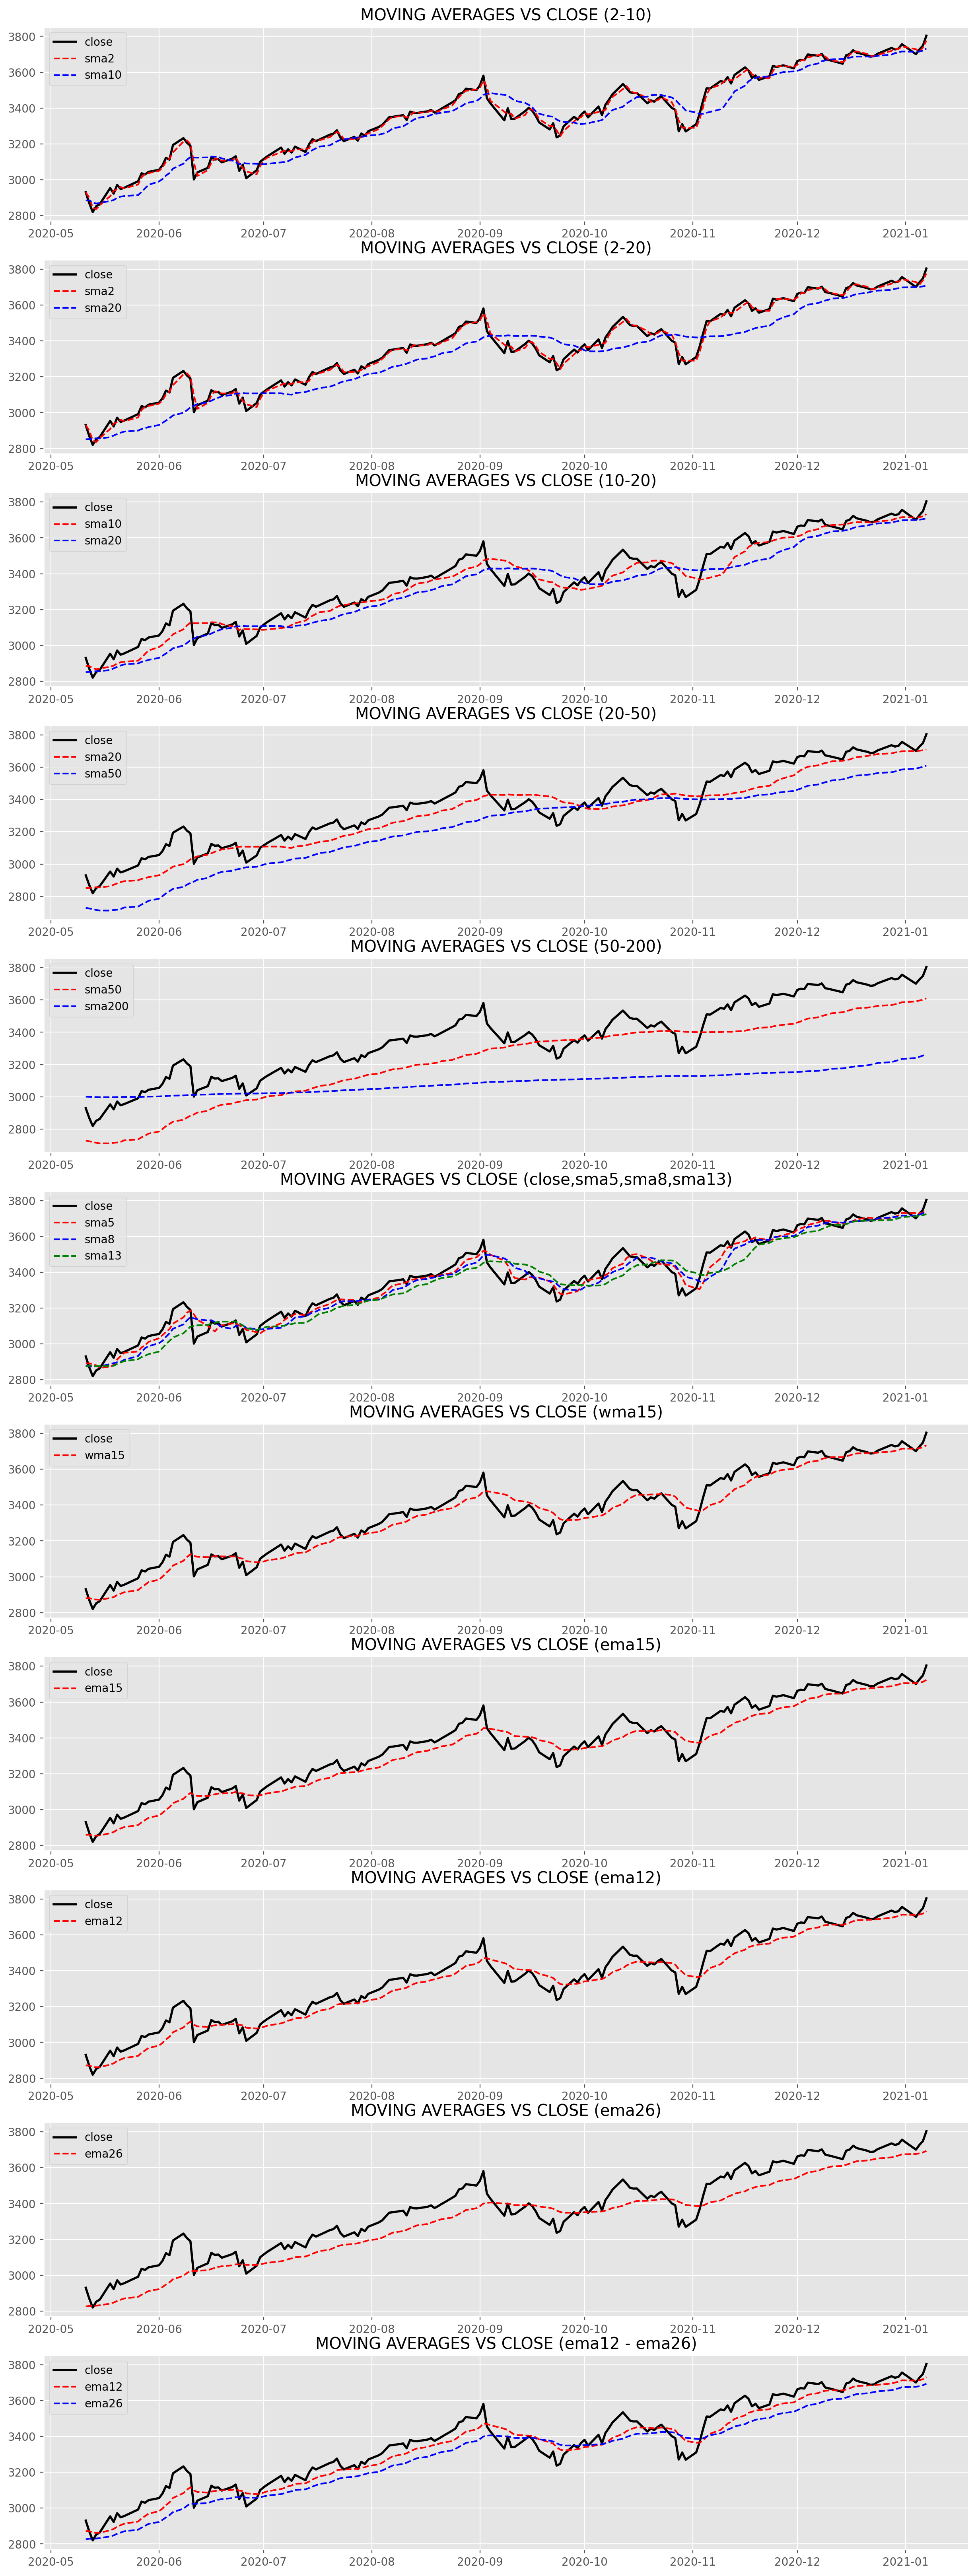

In [31]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(11,1, figsize=(15,42), dpi=200)

axs[0].plot(last_year['close'], c='k', ls='-', lw=2)
axs[0].plot(last_year['sma2'], 'r--', lw=1.5) 
axs[0].plot(last_year['sma10'], 'b--', lw=1.5)
axs[0].legend(['close','sma2', 'sma10'])
axs[0].set_title('MOVING AVERAGES VS CLOSE (2-10)')

axs[1].plot(last_year['close'], c='k', ls='-', lw=2)
axs[1].plot(last_year['sma2'], 'r--', lw=1.5) 
axs[1].plot(last_year['sma20'], 'b--', lw=1.5)
axs[1].legend(['close','sma2', 'sma20'])
axs[1].set_title('MOVING AVERAGES VS CLOSE (2-20)')

axs[2].plot(last_year['close'], c='k', ls='-', lw=2)
axs[2].plot(last_year['sma10'], 'r--', lw=1.5) 
axs[2].plot(last_year['sma20'], 'b--', lw=1.5)
axs[2].legend(['close','sma10', 'sma20'])
axs[2].set_title('MOVING AVERAGES VS CLOSE (10-20)')

axs[3].plot(last_year['close'], c='k', ls='-', lw=2)
axs[3].plot(last_year['sma20'], 'r--', lw=1.5) 
axs[3].plot(last_year['sma50'], 'b--', lw=1.5)
axs[3].legend(['close','sma20', 'sma50'])
axs[3].set_title('MOVING AVERAGES VS CLOSE (20-50)')

axs[4].plot(last_year['close'], c='k', ls='-', lw=2)
axs[4].plot(last_year['sma50'], 'r--', lw=1.5) 
axs[4].plot(last_year['sma200'], 'b--', lw=1.5)
axs[4].legend(['close','sma50', 'sma200'])
axs[4].set_title('MOVING AVERAGES VS CLOSE (50-200)')

axs[5].plot(last_year['close'], c='k', ls='-', lw=2)
axs[5].plot(last_year['sma5'], 'r--', lw=1.5) 
axs[5].plot(last_year['sma8'], 'b--', lw=1.5)
axs[5].plot(last_year['sma13'], 'g--', lw=1.5)
axs[5].legend(['close','sma5', 'sma8','sma13'])
axs[5].set_title('MOVING AVERAGES VS CLOSE (close,sma5,sma8,sma13)')

axs[6].plot(last_year['close'], c='k', ls='-', lw=2)
axs[6].plot(last_year['wma15'], 'r--', lw=1.5) 
axs[6].legend(['close','wma15'])
axs[6].set_title('MOVING AVERAGES VS CLOSE (wma15)')

axs[7].plot(last_year['close'], c='k', ls='-', lw=2)
axs[7].plot(last_year['ema15'], 'r--', lw=1.5) 
axs[7].legend(['close','ema15'])
axs[7].set_title('MOVING AVERAGES VS CLOSE (ema15)')

axs[8].plot(last_year['close'], c='k', ls='-', lw=2)
axs[8].plot(last_year['ema12'], 'r--', lw=1.5) 
axs[8].legend(['close','ema12'])
axs[8].set_title('MOVING AVERAGES VS CLOSE (ema12)')

axs[9].plot(last_year['close'], c='k', ls='-', lw=2)
axs[9].plot(last_year['ema26'], 'r--', lw=1.5) 
axs[9].legend(['close','ema26'])
axs[9].set_title('MOVING AVERAGES VS CLOSE (ema26)')

axs[10].plot(last_year['close'], c='k', ls='-', lw=2)
axs[10].plot(last_year['ema12'], 'r--', lw=1.5) 
axs[10].plot(last_year['ema26'], 'b--', lw=1.5) 
axs[10].legend(['close','ema12', 'ema26'])
axs[10].set_title('MOVING AVERAGES VS CLOSE (ema12 - ema26)');